## Basis Set Convergence

plotting Dimerization-energy vs cardinal number for HF, MP2 and TPSS_D3


In [20]:
import numpy as np
import re
from itertools import islice
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as const

import os
import sys
from pathlib import Path
from matplotlib import style
from lmfit import Parameters, fit_report, minimize
from lmfit.models import LinearModel
style.use('default')                # needed for vscode dark theme to see the axis

In [21]:
save_as_pgf = 0
save_as_pdf = 1

if save_as_pgf == 1:
    #mpl.use("pgf")                        
    mpl.rc('text', usetex=True)           # needed for latex
    mpl.rc('pgf', texsystem='pdflatex')   # change this if using xetex or luatex
    mpl.rc('pgf', rcfonts=False)          # don't setup fonts from rc parameters
    mpl.rc('pgf', preamble="\n".join([    # load additional packages
           r"\usepackage[utf8x]{inputenc}",
           r"\usepackage[T1]{fontenc}",
           r"\usepackage{amsmath,amsfonts,amsthm,amssymb,amstext}"]))
    mpl.rc('font', size=8)                # default font size
    mpl.rc('font', family='serif')          # use serif fonts
    #mpl.rc('font', family='sans-serif')   # use sans-serif fonts
    mpl.rc('font', serif='Latin Modern')  # use latex default serif font
    mpl.rc('axes', titlesize=10)           # fontsize of the axes title
    mpl.rc('axes', titlepad=2)            # pad between axis and title
    mpl.rc('axes', labelsize=10)           # fontsize of the x and y labels
    mpl.rc('xtick', labelsize=8)          # fontsize of the tick labels
    mpl.rc('ytick', labelsize=8)          # fontsize of the tick labels
    mpl.rc('legend', fontsize=8)          # legend fontsize
    mpl.rc('figure', titlesize=10)         # fontsize of the figure title
    mpl.rc('lines', markersize=2)         # default line markersize
    mpl.rc('lines', marker="")            # default line marker
    mpl.rc('grid', alpha=0.4)             # transparency of the grid
    mpl.rc('grid', color="gray")          # color of the grid
    mpl.rc('grid', linewidth=0.5)         # linewidth of the grid
    mpl.rcParams['figure.constrained_layout.use'] = True # use constrained_layout
    mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["k", "r", "b", "g", "orange", "purple"]) #matplotlib colororder-default ändern
    lw = 1.0                              # linewidth of the lines

    # width and height of tex document in inches
    # For Katrins Bachelor thesis
    # in Latex:
    # \usepackage{layouts}
    # textwidth in inches: \printinunitsof{in}\prntlen{\textwidth}
    
    fig_width = 6.202
    fig_height = fig_width * 0.6
    
elif save_as_pdf == 1:
    normal = 9                              # fontsize of the text
    mpl.rc('font', size=normal+2)             # default font size
    mpl.rc('font', family='serif')          # use serif fonts
    mpl.rc('axes', titlesize=normal)        # fontsize of the axes title
    mpl.rc('axes', titlepad=5)              # pad between axis and title
    mpl.rc('axes', labelpad=7)              # pad between axis and label
    mpl.rc('axes', labelsize=normal+2)      # fontsize of the x and y labels
    mpl.rc('xtick', labelsize=normal)       # fontsize of the tick labels
    mpl.rc('ytick', labelsize=normal)       # fontsize of the tick labels
    mpl.rc('legend', fontsize=normal)       # legend fontsize
    mpl.rc('figure', titlesize=normal+4)    # fontsize of the figure title
    mpl.rc('lines', markersize=12)          # default line markersize
    mpl.rc('lines', marker="")              # default line marker
    mpl.rc('grid', alpha=0.4)               # transparency of the grid              
    mpl.rc('grid', color="gray")            # color of the grid
    mpl.rc('grid', linewidth=0.5)           # linewidth of the grid
    mpl.rcParams["xtick.major.size"] = 8    # major tick size in points
    mpl.rcParams["ytick.major.size"] = 8    # major tick size in points
    mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["k", "r", "b", "g", "orange", "purple"]) #matplotlib colororder-default ändern
    
    lw = 2
    ms_4 = 4
    ms_8 = 8

    # height and width for nice print in jupyter notebook
    fig_width = 8
    fig_height = 5
    
else:
    mpl.rc('font', size=16)                 # controls default text sizes
    mpl.rc('axes', titlesize=16)            # fontsize of the axes title
    mpl.rc('axes', labelsize=18)            # fontsize of the x and y labels
    mpl.rc('xtick', labelsize=16)           # fontsize of the tick labels
    mpl.rc('ytick', labelsize=16)           # fontsize of the tick labels
    mpl.rc('legend', fontsize=18)           # legend fontsize
    mpl.rc('figure', titlesize=18)          # fontsize of the figure title
    mpl.rc('grid', alpha=0.4)
    mpl.rc('lines', markersize=10)    
    
    

def save_plot_as_pgf(fig, path):
  if save_as_pgf == 1:
    fig.savefig(path, format="pgf")

def save_plot_as_pdf(fig, path):
  if save_as_pdf == 1:
    fig.savefig(path, format="pdf", bbox_inches='tight')


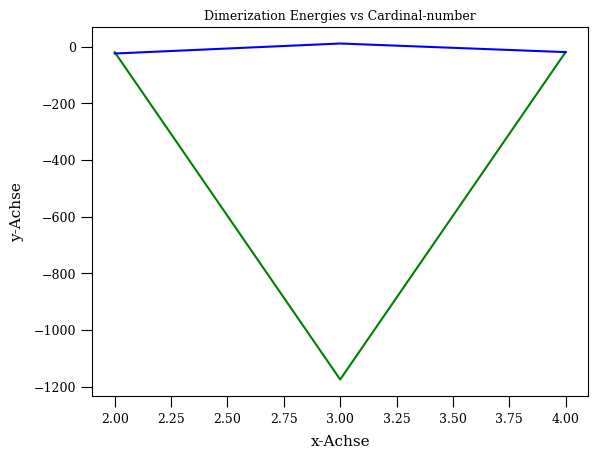

In [22]:
# load data: Monomer

with open('Monomer_energies', 'r') as f:
    lines = f.readlines()

Monomer = np.loadtxt(lines)
# a means aug, cc omitted
Mo_hf_a_D = Monomer[0]
Mo_hf_a_Q = Monomer[1]
Mo_hf_a_T = Monomer[2]
Mo_hf_D = Monomer[3]
Mo_hf_Q = Monomer[4]
Mo_hf_T = Monomer[5]
Mo_dft_a_D = Monomer[6]
Mo_dft_a_Q = Monomer[7]
Mo_dft_a_T = Monomer[8]
Mo_dft_D = Monomer[9]
Mo_dft_Q = Monomer[10]
Mo_dft_T = Monomer[11]
Mo_MP2_a_D = Monomer[12]
Mo_MP2_a_Q = Monomer[13]
Mo_MP2_a_T = Monomer[14]
Mo_MP2_D = Monomer[15]
Mo_MP2_Q = Monomer[16]
Mo_MP2_T = Monomer[17]

# load data: Dimer

with open('Dimer_energies', 'r') as f:
    lines = f.readlines()

Dimer = np.loadtxt(lines)

Di_hf_a_D = Dimer[0]
Di_hf_a_Q = Dimer[1]
Di_hf_a_T = Dimer[2]
Di_hf_D = Dimer[3]
Di_hf_Q = Dimer[4]
Di_hf_T = Dimer[5]
Di_dft_a_D = Dimer[6]
Di_dft_a_Q = Dimer[7]
Di_dft_a_T = Dimer[8]
Di_dft_D = Dimer[9]
Di_dft_Q = Dimer[10]
Di_dft_T = Dimer[11]
Di_MP2_a_D = Dimer[12]
Di_MP2_a_Q = Dimer[13]
Di_MP2_a_T = Dimer[14]
Di_MP2_D = Dimer[15]
Di_MP2_Q = Dimer[16]
Di_MP2_T = Dimer[17]

#Dimerization Energy

E_hf_a_d = Di_hf_a_D - 2 * Mo_hf_a_D
E_hf_a_t = Di_hf_a_T - 2 * Mo_hf_a_T
E_hf_a_q = Di_hf_a_Q - 2 * Mo_hf_a_Q
E_hf_d = Di_hf_D - 2 * Mo_hf_D
E_hf_t = Di_hf_T - 2 * Mo_hf_T
E_hf_q = Di_hf_Q - 2 * Mo_hf_Q

E_dft_a_d = Di_dft_a_D - 2 * Mo_dft_a_D
E_dft_a_t = Di_dft_a_T - 2 * Mo_dft_a_T
E_dft_a_q = Di_dft_a_Q - 2 * Mo_dft_a_Q
E_dft_d = Di_dft_D - 2 * Mo_dft_D
E_dft_t = Di_dft_T - 2 * Mo_dft_T
E_dft_q = Di_dft_Q - 2 * Mo_dft_Q

E_MP2_a_d = Di_MP2_a_D - 2 * Mo_MP2_a_D
E_MP2_a_t = Di_MP2_a_T - 2 * Mo_MP2_a_T
E_MP2_a_q = Di_MP2_a_Q - 2 * Mo_MP2_a_Q
E_MP2_d = Di_MP2_D - 2 * Mo_MP2_D
E_MP2_t = Di_MP2_T - 2 * Mo_MP2_T
E_MP2_q = Di_MP2_Q - 2 * Mo_MP2_Q

#plot Dimerization Energies against cardinal numbers

#HF

# define figure
#fig_width = 6.202
#fig_height = fig_width * 0.6
#fig = plt.figure(figsize=(fig_width, fig_height))
#spec = fig.add_gridspec(ncols=1, nrows=1, height_ratios=[1])


x = [2, 3, 4]  # x-Werte
y1 = [E_hf_a_d*627.503, E_hf_a_d*627.503, E_hf_a_q*627.503]  # erste y-Werte
y2 = [E_hf_d*627.503, E_hf_t*627.503, E_hf_q*627.503]  # zweite y-Werte

plt.plot(x, y1, 'g-', label='y1')  # Plot für den ersten y-Wert
plt.plot(x, y2, 'b-', label='y2')  # Plot für den zweiten y-Wert

plt.xlabel('x-Achse')  # Beschriftung der x-Achse
plt.ylabel('y-Achse')  # Beschriftung der y-Achse

plt.title('Dimerization Energies vs Cardinal-number')  # Titel des Graphen
plt.show()  # Graph anzeigen

## plot data
#lw = 1.0 
#ax1.plot(x, RHF, label='RHF', linewidth=lw)
#ax1.plot(x, UHF, label='UHF', linewidth=lw)
#ax1.plot(x, MP2, label='MP2', linewidth=lw)
#ax1.plot(x, CCSD_T, label='CCSD(T)', linewidth=lw)
#ax1.plot(x, CASSCF, label='CASSCF', linewidth=lw)
#ax1.plot(x, CASSCF_6, label='CASSCF(6)', linewidth=lw)
#
## set labels
#ax1.set_xlabel('Distance / Å')
#ax1.set_ylabel('Energy / Hartree')
#
## set limits
#ax1.set_xlim(0.5, 4.0)

# set legend and title
#ax1.legend(loc='best', fancybox=True, fontsize=8)
